<a href="https://colab.research.google.com/github/CynthiaQiu/teaching/blob/master/STAT6289_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv('TSLA.csv')
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [13]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

## **lag 1**

In [14]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [15]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0573
Epoch 2/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0181
Epoch 3/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0139
Epoch 4/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0131
Epoch 5/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0117
Epoch 6/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0118
Epoch 7/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0120
Epoch 9/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0118
Epoch 10/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0100
Epoch 11/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0103
Epoch 12/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0092
Epoch 13/100


In [16]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [17]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

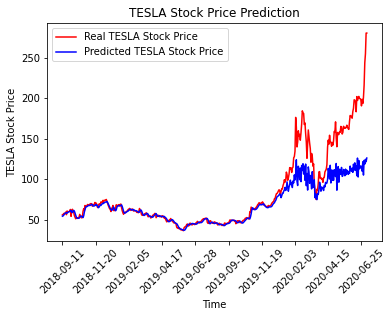

In [18]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **lag 7**

In [19]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [20]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 77ms/step - loss: 0.2463
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0574
Epoch 3/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0244
Epoch 4/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0421
Epoch 5/100
4/4 [==============================] - 0s 72ms/step - loss: 0.0259
Epoch 6/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0209
Epoch 7/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0211
Epoch 8/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0164
Epoch 9/100
4/4 [==============================] - 0s 75ms/step - loss: 0.0157
Epoch 10/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0140
Epoch 11/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0144
Epoch 12/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0121
Epoch 13/100
4/4 [==============================]

In [21]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [22]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

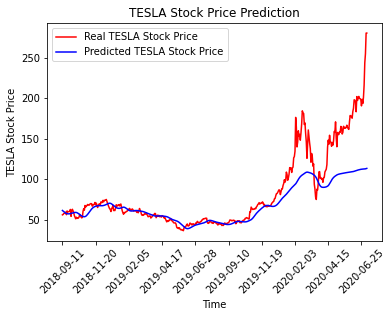

In [23]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **lag 14**

In [24]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [25]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 59ms/step - loss: 0.3039
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 0.1840
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0622
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0609
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0446
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0250
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0352
Epoch 8/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0378
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0366
Epoch 10/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0244
Epoch 11/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0168
Epoch 12/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0302
Epoch 13/100
2/2 [==============================]

In [26]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

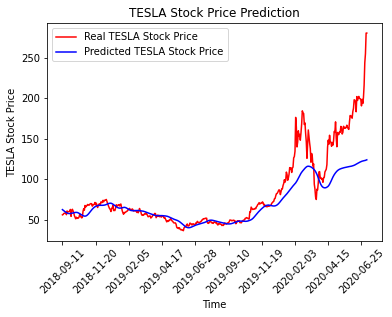

In [28]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **6 layer**

In [29]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [30]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 151ms/step - loss: 0.0534
Epoch 2/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0211
Epoch 3/100
24/24 [==============================] - 4s 163ms/step - loss: 0.0179
Epoch 4/100
24/24 [==============================] - 4s 159ms/step - loss: 0.0152
Epoch 5/100
24/24 [==============================] - 4s 160ms/step - loss: 0.0154
Epoch 6/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0147
Epoch 7/100
24/24 [==============================] - 4s 157ms/step - loss: 0.0149
Epoch 8/100
24/24 [==============================] - 4s 161ms/step - loss: 0.0143
Epoch 9/100
24/24 [==============================] - 4s 170ms/step - loss: 0.0141
Epoch 10/100
24/24 [==============================] - 4s 169ms/step - loss: 0.0144
Epoch 11/100
24/24 [==============================] - 4s 168ms/step - loss: 0.0124
Epoch 12/100
24/24 [==============================] - 4s 157ms/step - loss: 0.0129
Epoch 13/100


In [31]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [32]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

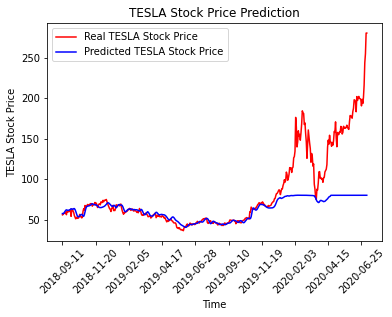

In [33]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **drop rate=0.1**

In [34]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [35]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.1))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0775
Epoch 2/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0139
Epoch 3/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0109
Epoch 4/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0108
Epoch 5/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0102
Epoch 6/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0108
Epoch 7/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0105
Epoch 8/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0109
Epoch 9/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0093
Epoch 10/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0085
Epoch 11/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0080
Epoch 12/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0083
Epoch 13/100


In [36]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [37]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

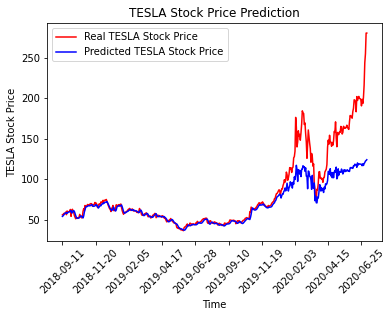

In [38]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **drop rate=0.5**

In [39]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [40]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0885
Epoch 2/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0252
Epoch 3/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0216
Epoch 4/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0199
Epoch 5/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0201
Epoch 6/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0239
Epoch 7/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0209
Epoch 8/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0187
Epoch 9/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0181
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0166
Epoch 11/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0168
Epoch 12/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0166
Epoch 13/100


In [41]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [42]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

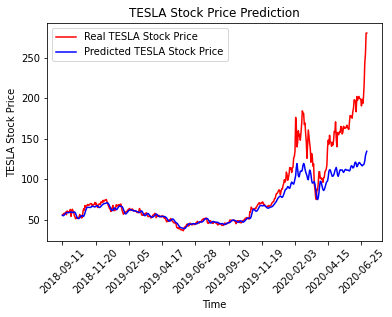

In [43]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **batch size=1**

In [44]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [45]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100
740/740 [==============================] - 33s 44ms/step - loss: 0.0236
Epoch 2/100
740/740 [==============================] - 32s 43ms/step - loss: 0.0127
Epoch 3/100
740/740 [==============================] - 33s 44ms/step - loss: 0.0087
Epoch 4/100
740/740 [==============================] - 32s 43ms/step - loss: 0.0073
Epoch 5/100
740/740 [==============================] - 32s 43ms/step - loss: 0.0064
Epoch 6/100
740/740 [==============================] - 31s 42ms/step - loss: 0.0055
Epoch 7/100
740/740 [==============================] - 31s 42ms/step - loss: 0.0051
Epoch 8/100
740/740 [==============================] - 31s 42ms/step - loss: 0.0047
Epoch 9/100
740/740 [==============================] - 32s 43ms/step - loss: 0.0043
Epoch 10/100
740/740 [==============================] - 32s 43ms/step - loss: 0.0042
Epoch 11/100
740/740 [==============================] - 31s 42ms/step - loss: 0.0043
Epoch 12/100
740/740 [==============================] - 31s 42ms/step - lo

In [47]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [48]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

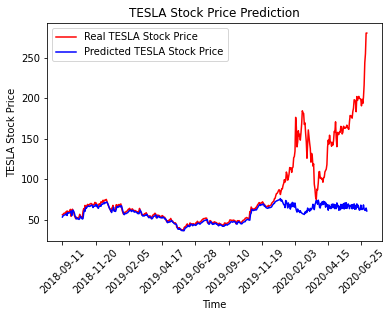

In [49]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **batch size=2**

In [50]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [51]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 2)

Epoch 1/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0313
Epoch 2/100
370/370 [==============================] - 18s 50ms/step - loss: 0.0202
Epoch 3/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0168
Epoch 4/100
370/370 [==============================] - 18s 47ms/step - loss: 0.0137
Epoch 5/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0121
Epoch 6/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0116
Epoch 7/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0116
Epoch 8/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0094
Epoch 9/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0083
Epoch 10/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0071
Epoch 11/100
370/370 [==============================] - 18s 48ms/step - loss: 0.0070
Epoch 12/100
370/370 [==============================] - 18s 48ms/step - lo

In [52]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [53]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

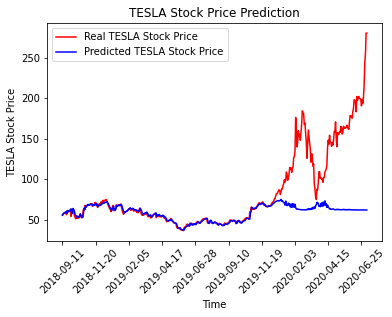

In [54]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## **Prediction**

In [55]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [56]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0975
Epoch 2/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0186
Epoch 3/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0139
Epoch 4/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0131
Epoch 5/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0119
Epoch 6/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0117
Epoch 8/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0122
Epoch 9/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0109
Epoch 10/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0104
Epoch 11/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0098
Epoch 12/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0097
Epoch 13/100
2

In [57]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [60]:
import copy
predicted_days=14
X_test2=copy.deepcopy(X_test)
for i in range(predicted_days):
    X_temp=np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]=X_test2[-1][j+1][0]
    X_temp[0][59][0]=model.predict(X_test2[-1:])[0][0]
    X_test2=np.vstack([X_test2,X_temp])
predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 54.89418 ]
 [ 55.04955 ]
 [ 55.91803 ]
 [ 57.12268 ]
 [ 58.03149 ]
 [ 58.471294]
 [ 58.986126]
 [ 58.31376 ]
 [ 58.82647 ]
 [ 59.52652 ]
 [ 59.9581  ]
 [ 60.185276]
 [ 60.393993]
 [ 61.348057]
 [ 59.228355]
 [ 58.88715 ]
 [ 60.45335 ]
 [ 61.3626  ]
 [ 60.667015]
 [ 58.350803]
 [ 55.71259 ]
 [ 53.374634]
 [ 52.357456]
 [ 52.036064]
 [ 52.18769 ]
 [ 52.375313]
 [ 52.787426]
 [ 54.179924]
 [ 54.962776]
 [ 54.79896 ]
 [ 53.873604]
 [ 53.091095]
 [ 54.94125 ]
 [ 59.23723 ]
 [ 62.13971 ]
 [ 65.05661 ]
 [ 65.99168 ]
 [ 66.01064 ]
 [ 66.34486 ]
 [ 67.20477 ]
 [ 67.50382 ]
 [ 67.31311 ]
 [ 67.4783  ]
 [ 68.14946 ]
 [ 68.61611 ]
 [ 68.64035 ]
 [ 67.10257 ]
 [ 66.81943 ]
 [ 67.05666 ]
 [ 67.56119 ]
 [ 68.881454]
 [ 68.274864]
 [ 68.394005]
 [ 67.07644 ]
 [ 65.333786]
 [ 65.66486 ]
 [ 67.09125 ]
 [ 68.15095 ]
 [ 67.95091 ]
 [ 69.18214 ]
 [ 69.77148 ]
 [ 69.80264 ]
 [ 70.98367 ]
 [ 70.841644]
 [ 71.474174]
 [ 71.84791 ]
 [ 71.99071 ]
 [ 72.48278 ]
 [ 71.36201 ]
 [ 69.54059 ]
 [ 67.53618 ]
 [ 65.

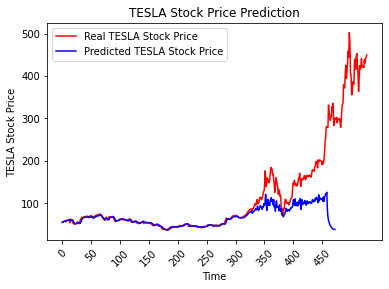

In [59]:
# Visualising the results
plt.plot(dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()